# Heart Disease Detection: Capstone Project

This capstone project aims to develop a machine learning model to predict heart disease using a dataset containing various cardiovascular health metrics. The project will involve data preprocessing, exploratory data analysis, feature engineering, model training, evaluation, and visualization.

**Dataset link:** https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

**Attribute information:**
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

## Data preparation

> As a first step, let's open the file, split the dataset onto training and test ones with stratification and make them available for EDA

In [1]:
import pandas as pd

heart_df = pd.read_csv("heart.csv")

In [2]:
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
X = heart_df.drop('HeartDisease', axis=1)
y = heart_df['HeartDisease']

In [4]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [5]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [7]:
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")

X_train shape: (734, 11)
X_val shape: (184, 11)
y_train shape: (734,)
y_val shape: (184,)


## EDA

> For EDA, we will work only with train datasets so that we would not be biased and obtain representative result on a validation dataset

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 734 entries, 485 to 62
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             734 non-null    int64  
 1   Sex             734 non-null    object 
 2   ChestPainType   734 non-null    object 
 3   RestingBP       734 non-null    int64  
 4   Cholesterol     734 non-null    int64  
 5   FastingBS       734 non-null    int64  
 6   RestingECG      734 non-null    object 
 7   MaxHR           734 non-null    int64  
 8   ExerciseAngina  734 non-null    object 
 9   Oldpeak         734 non-null    float64
 10  ST_Slope        734 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 68.8+ KB


> Here we see that some columns have numeric values and some of them involve text values. All 734 records have values in them, so there is no need to work on strategies of handling missing values. Let's try to explore column by column at first

### Age column

In [9]:
X_train["Age"].describe()

count    734.000000
mean      53.848774
std        9.440574
min       29.000000
25%       47.000000
50%       55.000000
75%       61.000000
max       77.000000
Name: Age, dtype: float64

<Axes: >

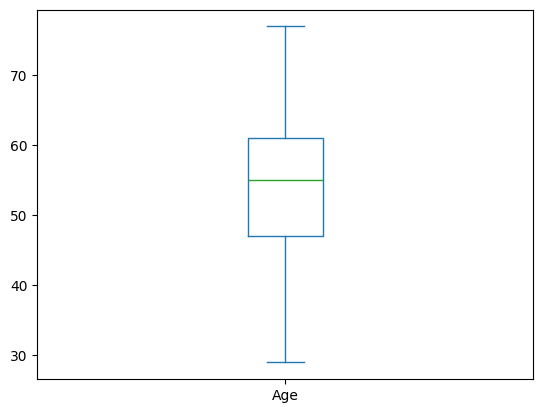

In [10]:
X_train["Age"].plot(kind="box")

<Axes: ylabel='Frequency'>

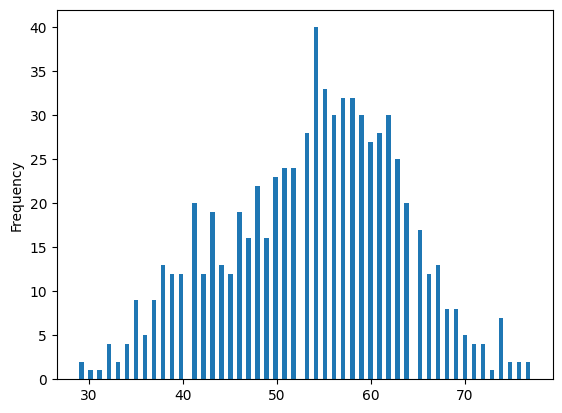

In [11]:
X_train["Age"].plot(kind="hist", bins=100)

> Okay, we are getting a sense of data and it seems that age has a normal distribution. Let's ues a **seaborn** library further on for better visualizations including smoothening the dataset and depicting it as one line by setting **kde** to *True*

<Axes: xlabel='Age', ylabel='Count'>

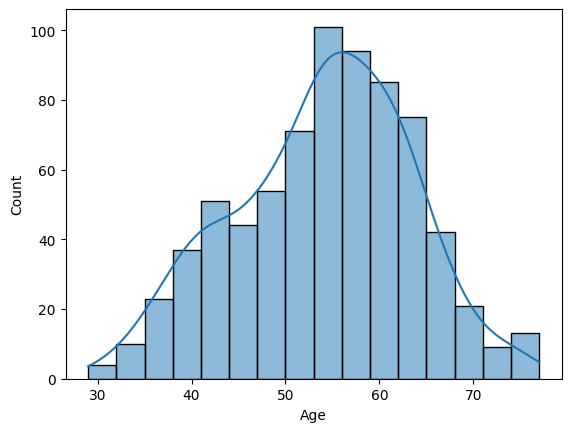

In [12]:
import seaborn as sns

sns.histplot(X_train["Age"], kde=True)

> Great, it seems that the bell curve is present and we confirm that this column has a normal distribution so that we can move further on to **Sex** column

### Sex column

In [13]:
X_train["Sex"].head()

485    M
486    M
117    F
361    M
296    M
Name: Sex, dtype: object

In [14]:
X_train["Sex"].describe()

count     734
unique      2
top         M
freq      579
Name: Sex, dtype: object

> This column represents text values and it has two unique values, M for male and F for female genders

In [15]:
X_train["Sex"].value_counts()

Sex
M    579
F    155
Name: count, dtype: int64

In [16]:
sex_percent = X_train["Sex"].value_counts(normalize=1) * 100
sex_percent.apply(lambda x: f"{x:0.2f}%")

Sex
M    78.88%
F    21.12%
Name: proportion, dtype: object

> We see that there are mostly men in the dataset since cardiovascular pathology is more common among this gender. Let's try to see what is the age distribution between genders

<Axes: xlabel='Age', ylabel='Count'>

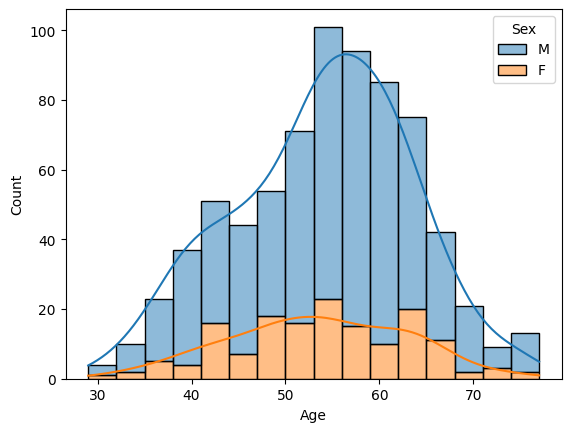

In [17]:
sns.histplot(data=X_train, x="Age", hue="Sex", multiple="stack", kde=True)

> Okay, we see that there is a common pattern that there are more men than woman in all age groups. Let's move forward to ChestPainType

### ChestPainType column

In [18]:
X_train["ChestPainType"].head()

485    ATA
486    ATA
117    ASY
361    ASY
296    ASY
Name: ChestPainType, dtype: object

In [19]:
X_train["ChestPainType"].describe()

count     734
unique      4
top       ASY
freq      403
Name: ChestPainType, dtype: object

> Here we see that this colimn contains text and that there are 4 unique chest pain types as was mentioned in the dataset description

In [20]:
X_train["ChestPainType"].value_counts()

ChestPainType
ASY    403
NAP    155
ATA    136
TA      40
Name: count, dtype: int64

In [21]:
pain_percent = X_train["ChestPainType"].value_counts(normalize=1) * 100
pain_percent.apply(lambda x: f"{x:0.2f}%")

ChestPainType
ASY    54.90%
NAP    21.12%
ATA    18.53%
TA      5.45%
Name: proportion, dtype: object

> Now we determined that the most common form is asymptomatic that is seen in more than half of patients, second one is Non-Anginal Pain, then Atypical Angina and Typical Angina being the rarest one. Let's see what is the distribution of chest pain types among genders and ages

<Axes: xlabel='Sex', ylabel='Count'>

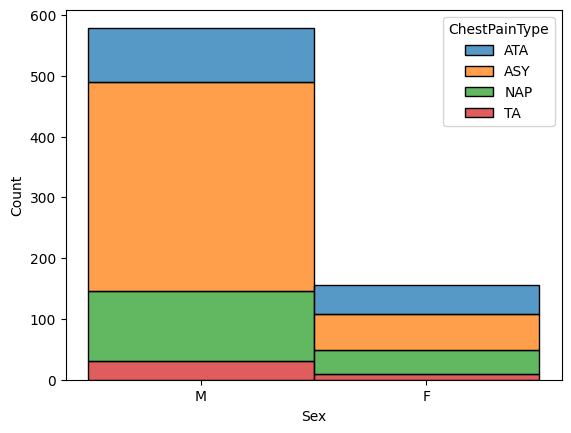

In [22]:
sns.histplot(data=X_train, x="Sex", hue="ChestPainType", multiple="stack")

In [23]:
X_train.groupby("Sex")["ChestPainType"].value_counts()

Sex  ChestPainType
F    ASY               59
     ATA               47
     NAP               40
     TA                 9
M    ASY              344
     NAP              115
     ATA               89
     TA                31
Name: count, dtype: int64

In [24]:
counts = X_train.groupby(['Sex', 'ChestPainType']).size().unstack(fill_value=0)
counts = counts.div(counts.sum(axis=1), axis=0) * 100
counts = counts.round(2)
counts

ChestPainType,ASY,ATA,NAP,TA
Sex,,,,
F,38.06,30.32,25.81,5.81
M,59.41,15.37,19.86,5.35


> Here we see that for both men and woman the sex asyptomatic form is the most common one, however for females this percentage is much lower. Interestingly, we see the **difference** in the second and third most common chest pain types for men and women, for **men** it is Non-Anginal Pain, then Atypical Angina, and for **women** vice versa, Atypical Angina and then Non-Anginal Pain. Typical Angina remains the last one. Let's move to the age 

<Axes: xlabel='Age', ylabel='Count'>

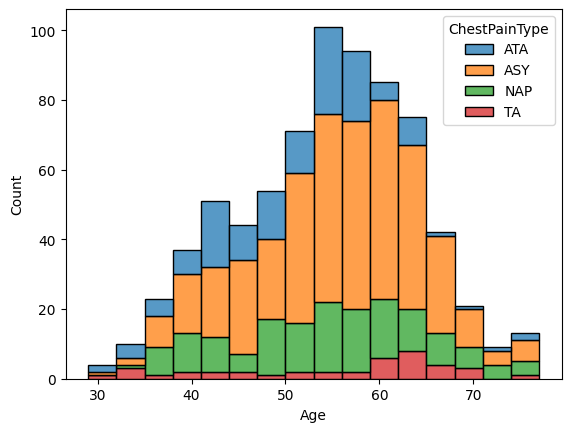

In [25]:
sns.histplot(data=X_train, x="Age", hue="ChestPainType", multiple="stack")

> It seems that maybe some information may be missing because we do not have enough bins. Let's redefine this plot

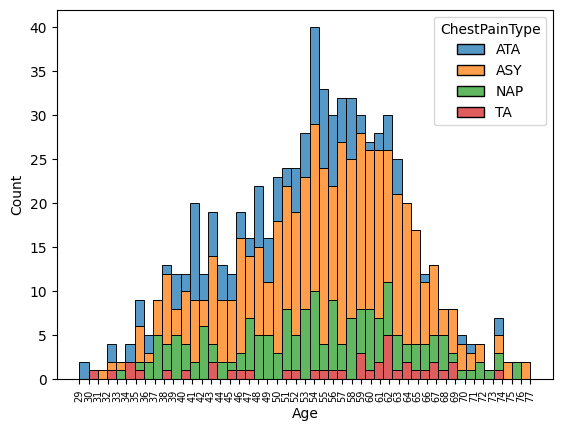

In [26]:
import matplotlib.pyplot as plt

unique_ages = sorted(X_train["Age"].unique())
sns.histplot(data=X_train, x="Age", hue="ChestPainType", multiple="stack", bins=len(unique_ages))
plt.xticks(unique_ages, rotation=90, fontsize=7)
plt.show()

> Okay, now we can see that asymptomatic form takes leading places almost in all age groups, however in some age groups (39-42, 47-50 and others) the other types of chest pains are predominant. It is however hard to conclude if this difference is statistically significant. Let's move forward to blood pressure 

### RestingBP column

> Let's explore the values present in this column

In [27]:
X_train["RestingBP"].head()

485    139
486    110
117    130
361    160
296    145
Name: RestingBP, dtype: int64

In [28]:
X_train["RestingBP"].describe()

count    734.000000
mean     132.874659
std       18.080330
min       92.000000
25%      120.000000
50%      130.000000
75%      141.000000
max      200.000000
Name: RestingBP, dtype: float64

> Here we see that this column is populated with numeric values. Let's try to have a sense of it's distribution

<Axes: xlabel='RestingBP', ylabel='Count'>

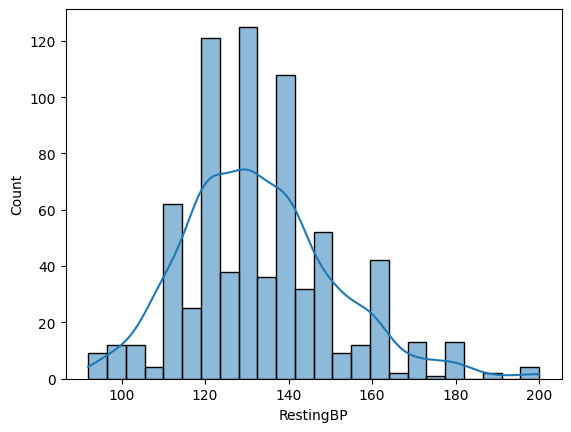

In [29]:
sns.histplot(X_train["RestingBP"], kde=True)

> Okay, wee see that there are more values at the range of less than 140 and the overall histogram is left centric. Let's add a gender information to it as well

<Axes: xlabel='RestingBP', ylabel='Count'>

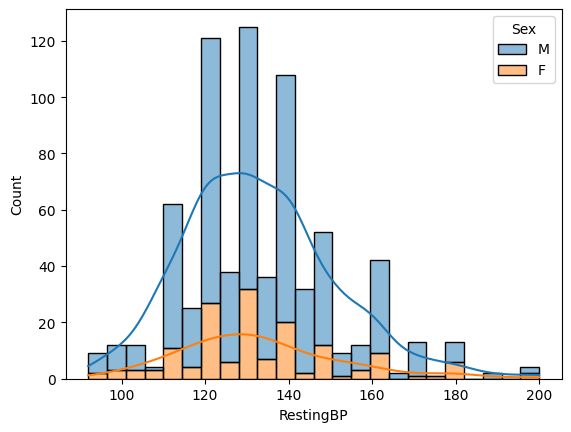

In [30]:
sns.histplot(data=X_train, x="RestingBP", hue="Sex", multiple="stack", kde=True)

> Okay, here we see that distribution is left-centric independent from gender. Let's move to cholesterol

### Cholesterol column

In [31]:
X_train["Cholesterol"].head()

485    217
486    214
117    338
361      0
296      0
Name: Cholesterol, dtype: int64

In [32]:
X_train["Cholesterol"].describe()

count    734.000000
mean     203.227520
std      108.402067
min        0.000000
25%      180.000000
50%      225.000000
75%      269.750000
max      603.000000
Name: Cholesterol, dtype: float64

> Okay, we see that here we obtain also values 0, what is impossible in living humans. Most likely this examination was not taken among these people. Let's see how many records are there with value 0

In [33]:
(X_train["Cholesterol"] == 0).sum()

129

> Pretty high number, it seems that we will need to approximate later when we will be preparing dataset for model training. Let's move forward to visualizations

<Axes: xlabel='Cholesterol', ylabel='Count'>

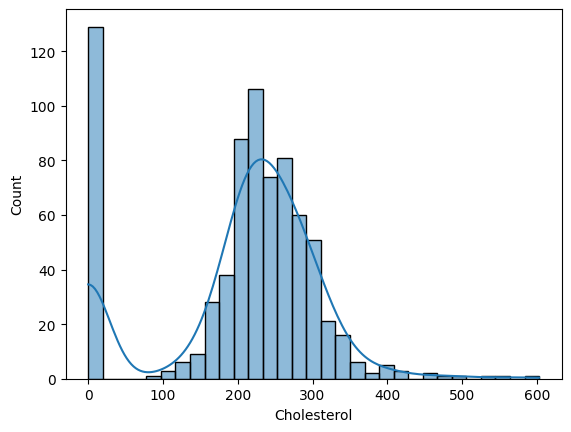

In [34]:
sns.histplot(X_train["Cholesterol"], kde=True)

> This 0 value disrupts visualizations, I'll drop it for now

<Axes: xlabel='Cholesterol', ylabel='Count'>

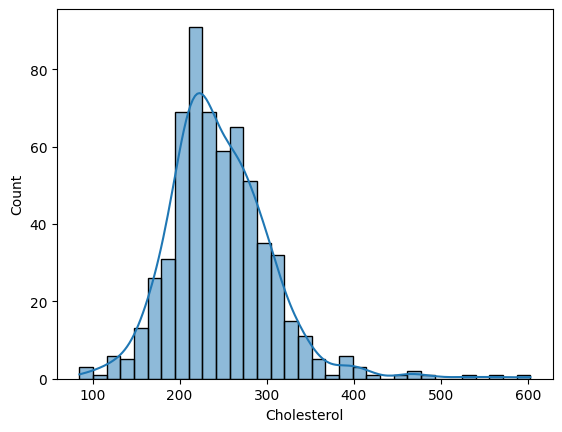

In [35]:
sns.histplot(X_train[X_train["Cholesterol"] != 0]["Cholesterol"], kde=True)

<Axes: xlabel='Cholesterol', ylabel='Count'>

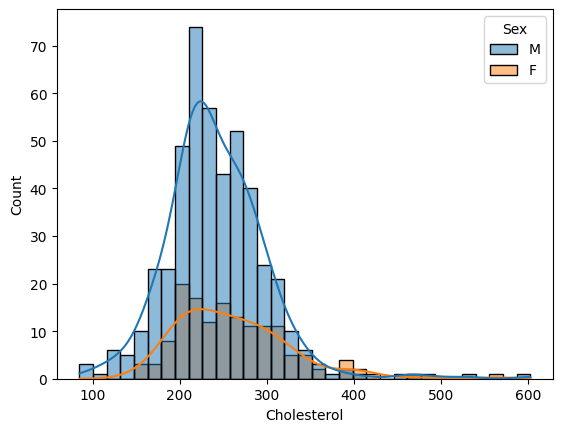

In [36]:
sns.histplot(data=X_train[X_train["Cholesterol"] != 0], x="Cholesterol", hue="Sex", kde=True)

> Okay, now we can coclude that the cholesterol values are more left centered and that in man there is a peak at around 220 - 280 mm/dl. At the same time, women have more flat distribution in this range and even from 200 - 320 mm/dl. Let's move further to fasting blood sugar

### FastingBS column

In [37]:
X_train["FastingBS"].head()

485    1
486    1
117    1
361    0
296    1
Name: FastingBS, dtype: int64

In [38]:
X_train["FastingBS"].describe()

count    734.000000
mean       0.228883
std        0.420400
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: FastingBS, dtype: float64

> Okay, as indicated, here we have binary values that indicate whether FastingBS > 120 mg/dl (1) or 0: otherwise. Let's now build plots and refer to statistics

<Axes: xlabel='FastingBS', ylabel='Count'>

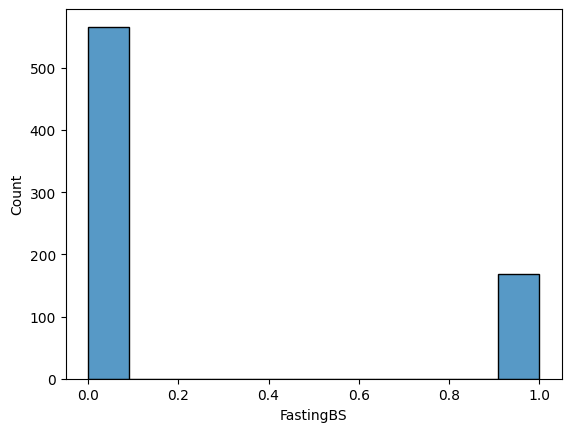

In [39]:
sns.histplot(X_train["FastingBS"])

<Axes: xlabel='Sex', ylabel='Count'>

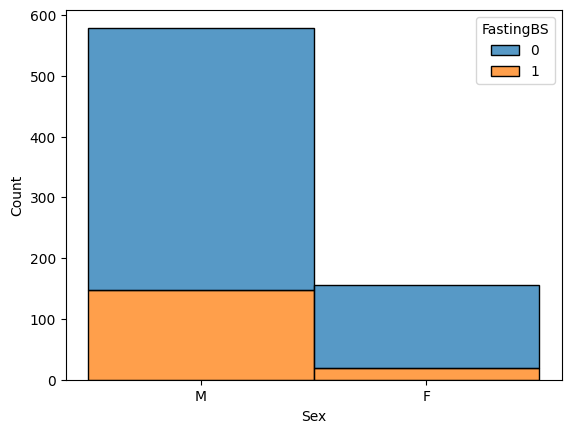

In [40]:
sns.histplot(data=X_train, x="Sex", hue="FastingBS", multiple="stack")

In [41]:
X_train.groupby("Sex")["FastingBS"].value_counts()

Sex  FastingBS
F    0            135
     1             20
M    0            431
     1            148
Name: count, dtype: int64

In [42]:
counts = X_train.groupby(["Sex", "FastingBS"]).size().unstack(fill_value=0)
counts = counts.div(counts.sum(axis=1), axis=0) * 100
counts = counts.round(2)
counts

FastingBS,0,1
Sex,,
F,87.10,12.90
M,74.44,25.56


> Here we see that increased FastingBS is less common than a regular FastingBS, at the same time increased FastingBS is more common among men than women

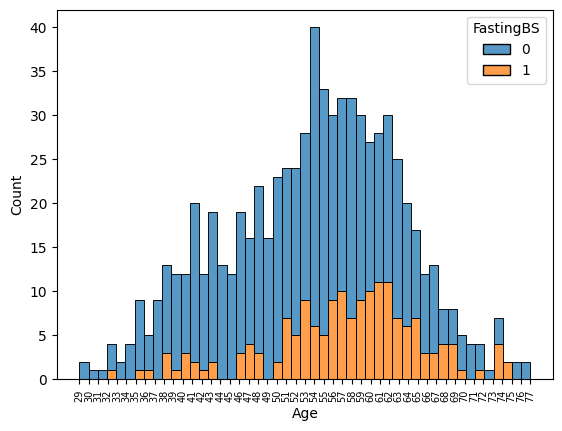

In [43]:
unique_ages = sorted(X_train["Age"].unique())
sns.histplot(data=X_train, x="Age", hue="FastingBS", multiple="stack", bins=len(unique_ages))
plt.xticks(unique_ages, rotation=90, fontsize=7)
plt.show()

> As for an age distribution, we see that starting from age 50 there is an increase in FastingBS, while, before this age, FastingBS remains relatively low. Let's move to resting electrocardiogram

### RestingECG column

In [44]:
X_train["RestingECG"].head()

485        ST
486        ST
117        ST
361    Normal
296    Normal
Name: RestingECG, dtype: object

In [45]:
X_train["RestingECG"].describe()

count        734
unique         3
top       Normal
freq         447
Name: RestingECG, dtype: object

> Here we have text column with three unique values as was indicated in the dataset decsription. Now let's visualize the data

<Axes: xlabel='RestingECG', ylabel='Count'>

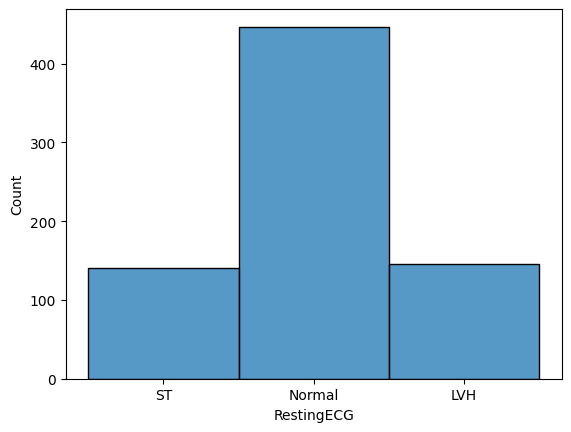

In [46]:
sns.histplot(X_train["RestingECG"])

In [47]:
X_train["RestingECG"].value_counts()

RestingECG
Normal    447
LVH       146
ST        141
Name: count, dtype: int64

> Here we see that normal resting ECG is the most common, meanwhile ST abnormalities and signs of LVH have mostly the same frequency 

<Axes: xlabel='Sex', ylabel='Count'>

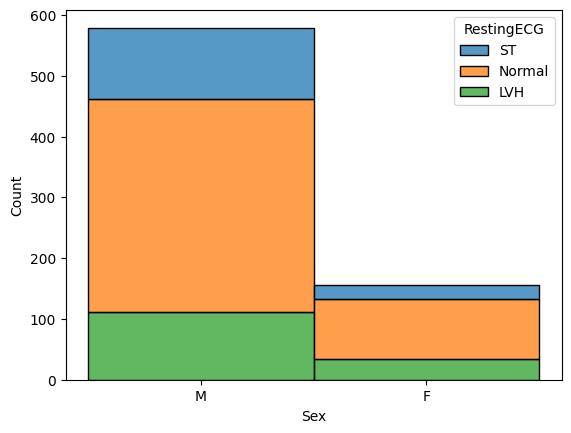

In [48]:
sns.histplot(data=X_train, x="Sex", hue="RestingECG", multiple="stack")

In [49]:
X_train.groupby("Sex")["RestingECG"].value_counts()

Sex  RestingECG
F    Normal         98
     LVH            34
     ST             23
M    Normal        349
     ST            118
     LVH           112
Name: count, dtype: int64

In [50]:
counts = X_train.groupby(["Sex", "RestingECG"]).size().unstack(fill_value=0)
counts = counts.div(counts.sum(axis=1), axis=0) * 100
counts = counts.round(2)
counts

RestingECG,LVH,Normal,ST
Sex,,,
F,21.94,63.23,14.84
M,19.34,60.28,20.38


> As for ECG distribution by gender, we see that among men LVH and ST abnormalities have almost the same frequency. As for women, the LVH is more predominant over ST abnormalities. Let's see the age distribution

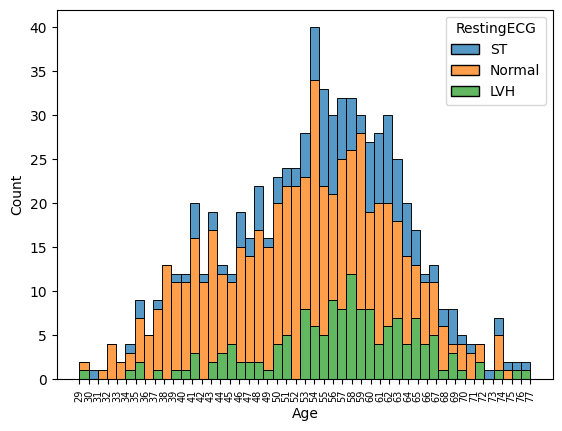

In [51]:
unique_ages = sorted(X_train["Age"].unique())
sns.histplot(data=X_train, x="Age", hue="RestingECG", multiple="stack", bins=len(unique_ages))
plt.xticks(unique_ages, rotation=90, fontsize=7)
plt.show()

> According to the data, most ST abnormalities and LVH tend to develop after the age of 50, while earlier electrophysiologic abnormalities are less frequent. Let's move to maximum HR achieved

### MaxHR column

In [52]:
X_train["MaxHR"].head()

485    128
486    180
117    130
361    124
296    139
Name: MaxHR, dtype: int64

In [53]:
X_train["MaxHR"].describe()

count    734.000000
mean     136.377384
std       25.832297
min       60.000000
25%      119.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

> Here we see that the column is numeric as declared in the dataset description. Let's vizualize the data

<Axes: xlabel='MaxHR', ylabel='Count'>

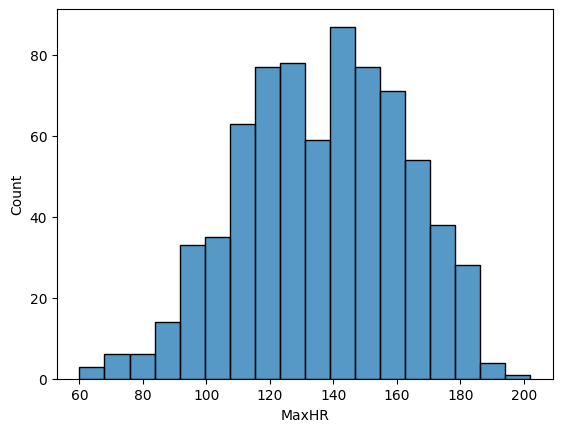

In [54]:
sns.histplot(X_train["MaxHR"])

<Axes: xlabel='MaxHR', ylabel='Count'>

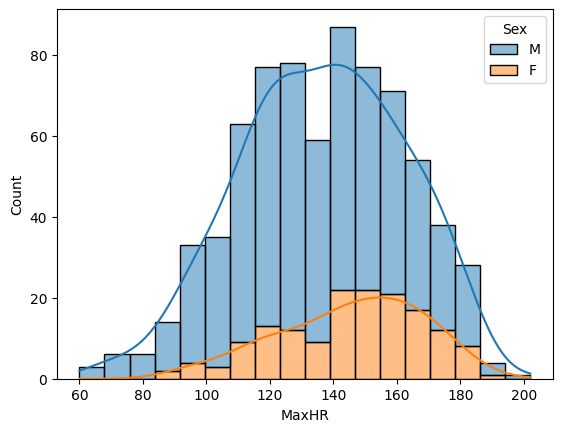

In [55]:
sns.histplot(data=X_train, x="MaxHR", hue="Sex", multiple="stack", kde=True)

> Now we see that more woman have higher values of MaxHR that was achieved. At the same time, for men we see that these values are mostly lower. Let's see if an age contributes to it as well

<Axes: xlabel='Age', ylabel='Count'>

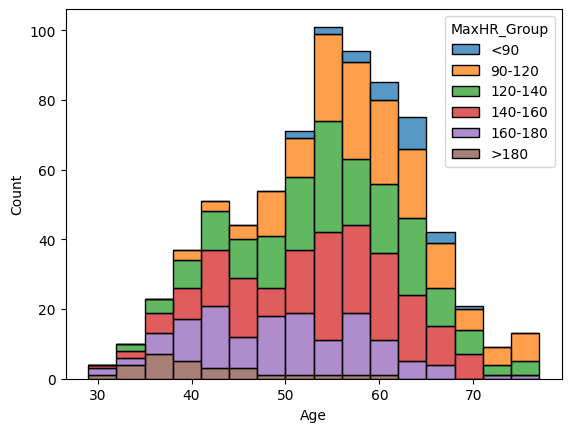

In [56]:
bins = [0, 90, 120, 140, 160, 180, float("inf")]
labels = ["<90", "90-120", "120-140", "140-160", "160-180", ">180"]
X_train["MaxHR_Group"] = pd.cut(X_train["MaxHR"], bins=bins, labels=labels, right=False)

sns.histplot(data=X_train, x="Age", hue="MaxHR_Group", multiple="stack")

In [57]:
X_train = X_train.drop("MaxHR_Group", axis=1)

> Okay, so here we see the patternthat starting from age 50 there is a drop in the maximum achievable HR and more people become physically intolerant to high load excercies. Next let's explore presence of angina during excercise

### ExerciseAngina column

In [58]:
X_train["ExerciseAngina"].head()

485    Y
486    N
117    Y
361    Y
296    Y
Name: ExerciseAngina, dtype: object

In [59]:
X_train["ExerciseAngina"].describe()

count     734
unique      2
top         N
freq      434
Name: ExerciseAngina, dtype: object

> So, the content matches with the description, we have two possible text values here. Let's visualize it

<Axes: xlabel='ExerciseAngina', ylabel='Count'>

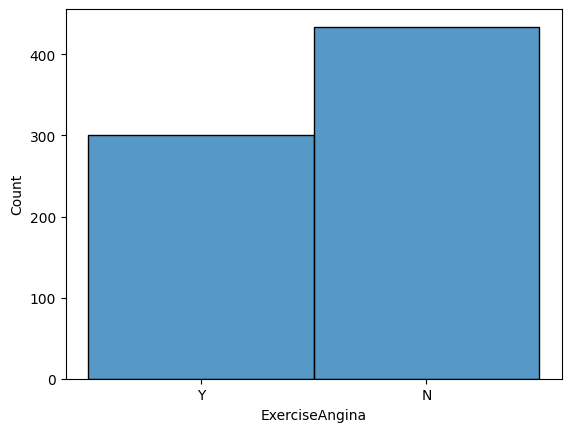

In [60]:
sns.histplot(X_train["ExerciseAngina"])

<Axes: xlabel='Sex', ylabel='Count'>

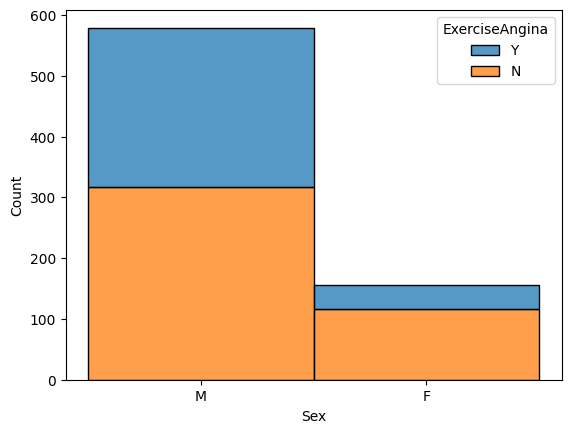

In [61]:
sns.histplot(data=X_train, x="Sex", hue="ExerciseAngina", multiple="stack")

In [62]:
X_train.groupby("Sex")["ExerciseAngina"].value_counts()

Sex  ExerciseAngina
F    N                 117
     Y                  38
M    N                 317
     Y                 262
Name: count, dtype: int64

In [63]:
counts = X_train.groupby(["Sex", "ExerciseAngina"]).size().unstack(fill_value=0)
counts = counts.div(counts.sum(axis=1), axis=0) * 100
counts = counts.round(2)
counts

ExerciseAngina,N,Y
Sex,,
F,75.48,24.52
M,54.75,45.25


> Here we see that in the current dataset men close to having excercise angina as well not and women are more likely to not have excervice angina

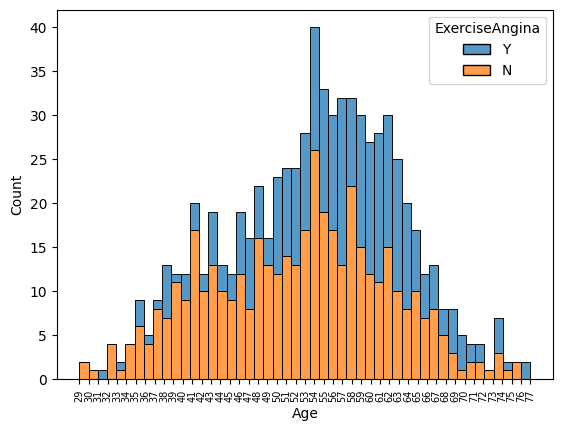

In [64]:
unique_ages = sorted(X_train["Age"].unique())
sns.histplot(data=X_train, x="Age", hue="ExerciseAngina", multiple="stack", bins=len(unique_ages))
plt.xticks(unique_ages, rotation=90, fontsize=7)
plt.show()

> In terms of age, we see that after 45 years people tend to increase the probability of excercise angina according to the dataset

### Oldpeak column

In [65]:
X_train["Oldpeak"].head()

485    1.2
486    0.4
117    1.5
361    0.0
296    0.7
Name: Oldpeak, dtype: float64

In [66]:
X_train["Oldpeak"].describe()

count    734.000000
mean       0.865123
std        1.056964
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        5.600000
Name: Oldpeak, dtype: float64

> Here we see numeric values that describe ST segment deviation. Let's explore the distribution further

<Axes: xlabel='Oldpeak', ylabel='Count'>

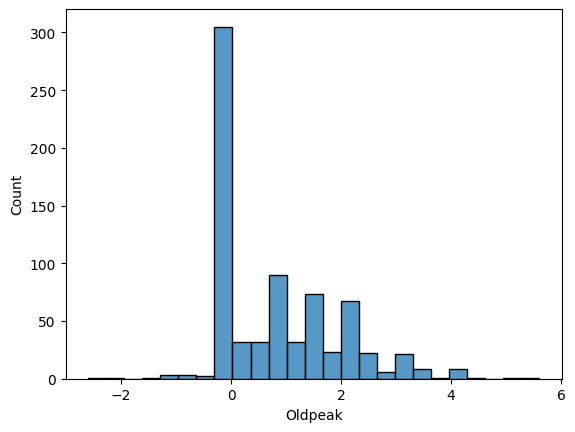

In [67]:
sns.histplot(X_train["Oldpeak"])

> Here we see that most people do not develop Oldpeak since value is somewhere around 0. Let's visualize by gender

<Axes: xlabel='Oldpeak', ylabel='Count'>

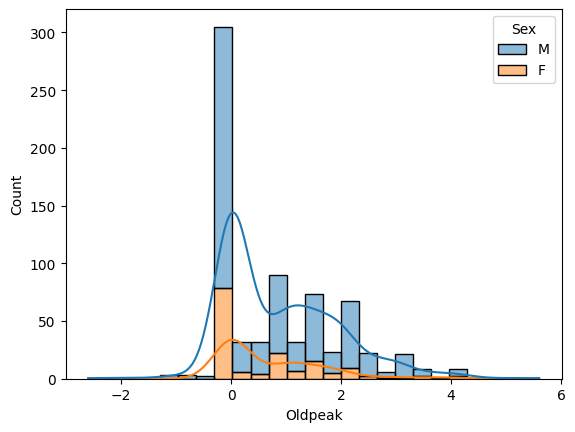

In [68]:
sns.histplot(data=X_train, x="Oldpeak", hue="Sex", multiple="stack", kde=True)

> To better understand the distribution, let's exclude Oldpeak value from -0.5 to 0.1

<Axes: xlabel='Oldpeak', ylabel='Count'>

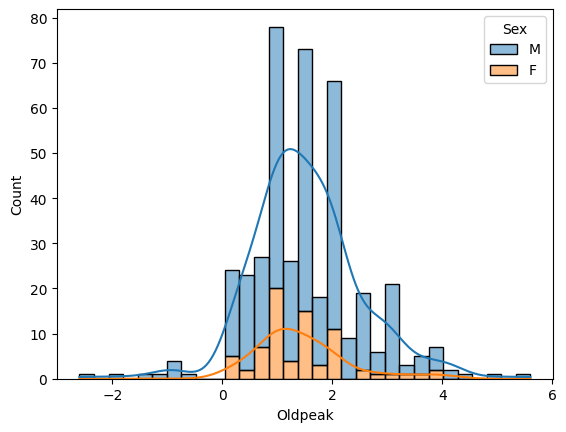

In [69]:
sns.histplot(data=X_train[(X_train["Oldpeak"] < -0.5) | (X_train["Oldpeak"] > 0.1)], x="Oldpeak", hue="Sex", multiple="stack", kde=True)

> Okay, so here we see that majority of people tend to develop slight depression of Oldpeak and the minority are tending to the elevation 

### ST_Slope column

In [70]:
X_train["ST_Slope"].head()

485    Flat
486      Up
117    Flat
361    Flat
296    Flat
Name: ST_Slope, dtype: object

In [71]:
X_train["ST_Slope"].describe()

count      734
unique       3
top       Flat
freq       374
Name: ST_Slope, dtype: object

> Here we see as well that there are 3 unique text values that are prsent in the dataset 

<Axes: xlabel='ST_Slope', ylabel='Count'>

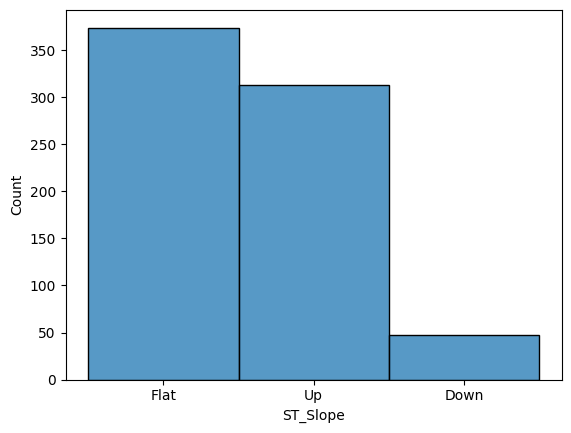

In [72]:
sns.histplot(X_train["ST_Slope"])

<Axes: xlabel='Sex', ylabel='Count'>

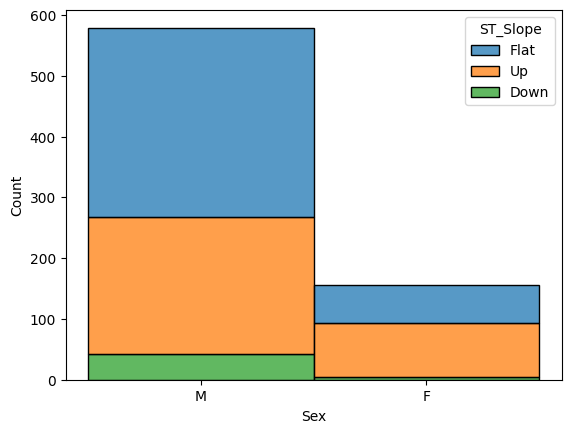

In [73]:
sns.histplot(data=X_train, x="Sex", hue="ST_Slope", multiple="stack")

In [74]:
X_train.groupby("Sex")["ST_Slope"].value_counts()

Sex  ST_Slope
F    Up           88
     Flat         62
     Down          5
M    Flat        312
     Up          225
     Down         42
Name: count, dtype: int64

In [75]:
counts = X_train.groupby(["Sex", "ST_Slope"]).size().unstack(fill_value=0)
counts = counts.div(counts.sum(axis=1), axis=0) * 100
counts = counts.round(2)
counts

ST_Slope,Down,Flat,Up
Sex,,,
F,3.23,40.00,56.77
M,7.25,53.89,38.86


> We see here that cases when ST clope directed downwoards is the least frequent case in women and slightly more common in men. The most common case here is flat or upward direction 

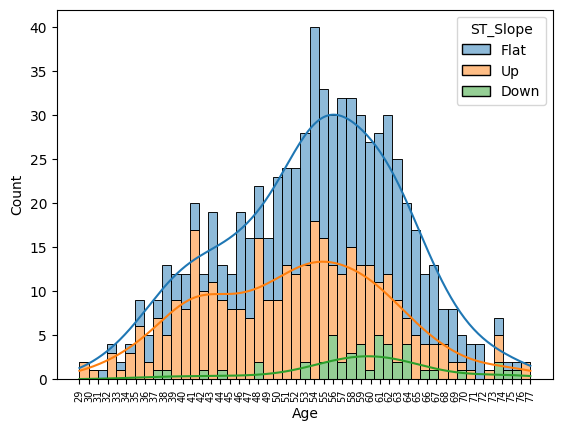

In [76]:
unique_ages = sorted(X_train["Age"].unique())
sns.histplot(data=X_train, x="Age", hue="ST_Slope", multiple="stack", bins=len(unique_ages), kde=True)
plt.xticks(unique_ages, rotation=90, fontsize=7)
plt.show()

> As for an age distribution, we see that downwards slope directions starts mostly to appear after the age of 55, but flat and upwards slope diretion is most common among all age groups 

### Relation to Heart diseases

> Up to now, we revised only the structure of the colums for understanding their content and without checking their relation to actual heart diseases column. Let's check that starting from temporary uniting our **X_train** and **y_train**

In [77]:
train_united = pd.concat([X_train, y_train], axis=1)

In [78]:
train_united.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
485,63,M,ATA,139,217,1,ST,128,Y,1.2,Flat,1
486,55,M,ATA,110,214,1,ST,180,N,0.4,Up,0
117,59,F,ASY,130,338,1,ST,130,Y,1.5,Flat,1
361,47,M,ASY,160,0,0,Normal,124,Y,0.0,Flat,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1


> Let's revise the distribution of heart disease by age first

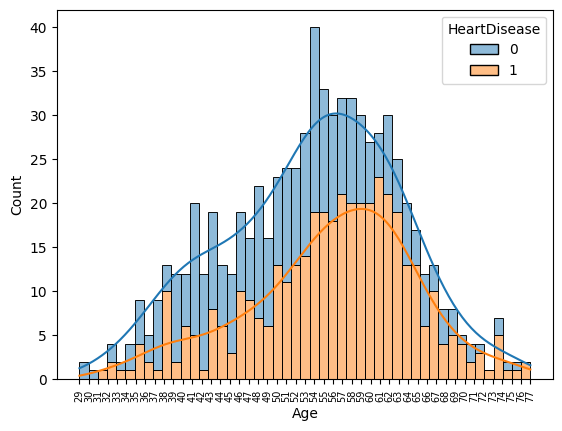

In [79]:
unique_ages = sorted(train_united["Age"].unique())
sns.histplot(data=train_united, x="Age", hue="HeartDisease", multiple="stack", bins=len(unique_ages), kde=True)
plt.xticks(unique_ages, rotation=90, fontsize=7)
plt.show()

> Okay, we see that there is a sudden increase in the heart disease in the age of 38, however more stready increase starts from age 50 and continues to grow while being predominant in the older age. Let's see the distribution by **gender** 

<Axes: xlabel='Sex', ylabel='Count'>

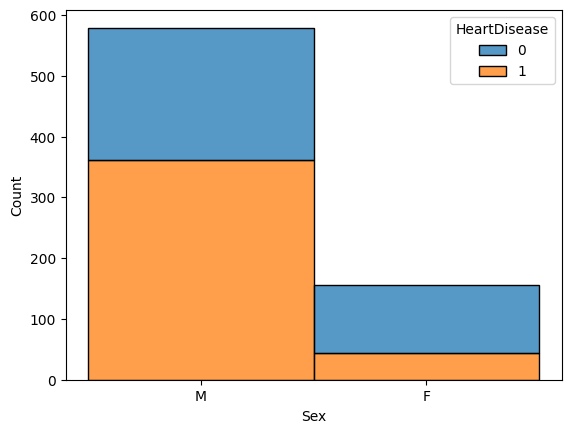

In [80]:
sns.histplot(data=train_united, x="Sex", hue="HeartDisease", multiple="stack")

In [81]:
train_united.groupby("Sex")["HeartDisease"].value_counts()

Sex  HeartDisease
F    0               111
     1                44
M    1               362
     0               217
Name: count, dtype: int64

In [82]:
counts = train_united.groupby(["Sex", "HeartDisease"]).size().unstack(fill_value=0)
counts = counts.div(counts.sum(axis=1), axis=0) * 100
counts = counts.round(2)
counts

HeartDisease,0,1
Sex,,
F,71.61,28.39
M,37.48,62.52


> Okay, now we see that the dataset is biased towards men, they have 63% of individuals having heart disease. At the same time, there are significantly lower number of women (28%) who have heart disease in their turn. It actually correlates with CVD epidemiology, however it could be not so benefitial in training. Let's see what is the distribution by **type of chest pain**

<Axes: xlabel='ChestPainType', ylabel='Count'>

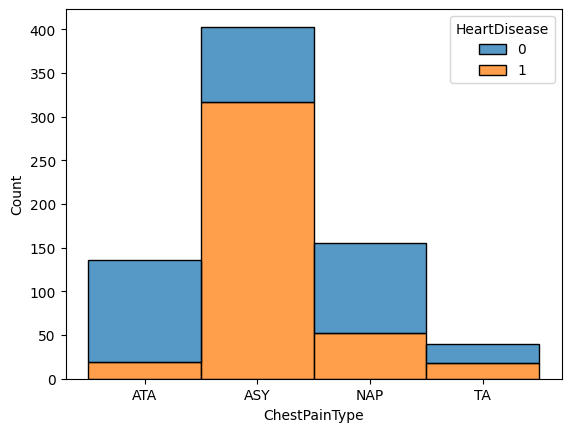

In [83]:
sns.histplot(data=train_united, x="ChestPainType", hue="HeartDisease", multiple="stack")

In [84]:
train_united.groupby("ChestPainType")["HeartDisease"].value_counts()

ChestPainType  HeartDisease
ASY            1               317
               0                86
ATA            0               117
               1                19
NAP            0               103
               1                52
TA             0                22
               1                18
Name: count, dtype: int64

In [85]:
counts = train_united.groupby(["ChestPainType", "HeartDisease"]).size().unstack(fill_value=0)
counts = counts.div(counts.sum(axis=1), axis=0) * 100
counts = counts.round(2)
counts

HeartDisease,0,1
ChestPainType,,
ASY,21.34,78.66
ATA,86.03,13.97
NAP,66.45,33.55
TA,55.00,45.00


> Here we see that asymptomatic chest pain is the most common among patients with heart disease. Among symptomatic ones, the most indicative is typical angina, the second one is non-anginal pain and the least indicative is atypical angina. Now let's see the distribution by **resting blood pressure**

<Axes: xlabel='RestingBP', ylabel='Count'>

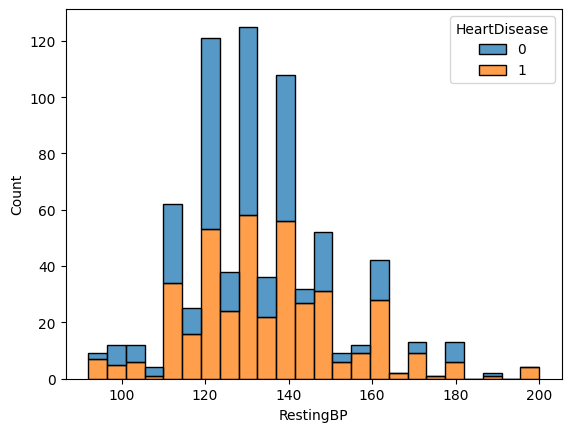

In [86]:
sns.histplot(data=train_united, x="RestingBP", hue="HeartDisease", multiple="stack")

> Here we see that there is no significant contribution of resting blood pressure on the presense of the heart disease according to this dataset. However it is seen that there is a slight increase of heart disease in distributionwuth an increasing blood pressure. Maybe because there are more patients with that have heart disease rather than not. Now let's visualize the distribution by **cholesterol level**

<Axes: xlabel='Cholesterol', ylabel='Count'>

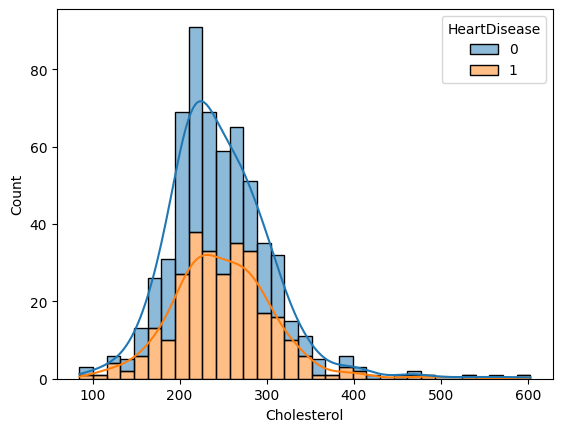

In [87]:
sns.histplot(data=train_united[train_united["Cholesterol"] != 0], x="Cholesterol", hue="HeartDisease", multiple="stack", kde=True)

> Okay, so, in case of this dataset, we do not see any evident pattern that states that cholesterol levels somehow impact the probability of heart disease. Let's move forward to **fasting blood sugar levels** 

<Axes: xlabel='FastingBS', ylabel='Count'>

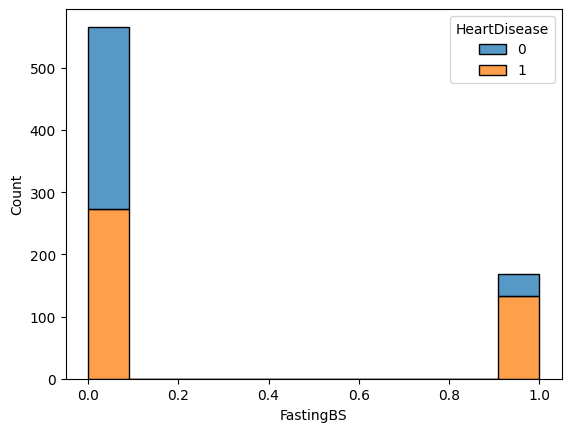

In [88]:
sns.histplot(data=train_united, x="FastingBS", hue="HeartDisease", multiple="stack")

> Okay, here we see that in most patients with heart disease the fasting blood sugar is increased and it is normal in almost half of patients with heart disease. This could be a good predictive feature. Next on the line is ECG at rest

<Axes: xlabel='RestingECG', ylabel='Count'>

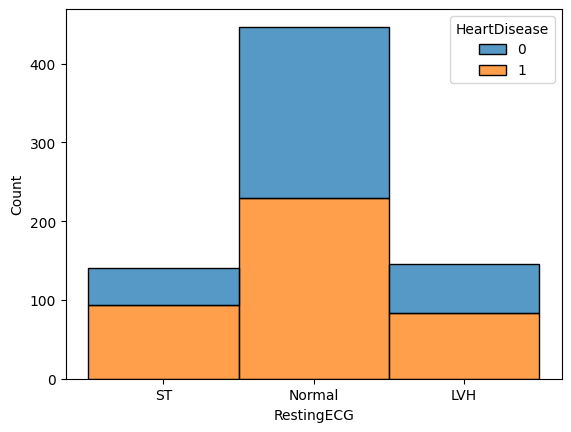

In [89]:
sns.histplot(data=train_united, x="RestingECG", hue="HeartDisease", multiple="stack")

In [90]:
train_united.groupby("RestingECG")["HeartDisease"].value_counts()

RestingECG  HeartDisease
LVH         1                84
            0                62
Normal      1               229
            0               218
ST          1                93
            0                48
Name: count, dtype: int64

In [91]:
counts = train_united.groupby(["RestingECG", "HeartDisease"]).size().unstack(fill_value=0)
counts = counts.div(counts.sum(axis=1), axis=0) * 100
counts = counts.round(2)
counts

HeartDisease,0,1
RestingECG,,
LVH,42.47,57.53
Normal,48.77,51.23
ST,34.04,65.96


> We see a sligh increase in presence of heart disease in patients with LVH and ST abnormalities and almost no difference in heatt disease in patients with normal ECG according to this dataset. Next column is **max heart rate** metrics

<Axes: xlabel='MaxHR', ylabel='Count'>

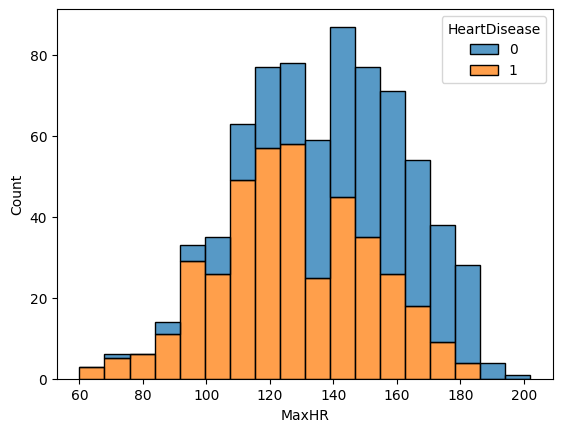

In [92]:
sns.histplot(data=train_united, x="MaxHR", hue="HeartDisease", multiple="stack")

> We see that lower max heart rate values are strong predictors of the presence of heart disease. It is necessary to mention that also lower heart values are correlated with higher age, another predictor if heart disease presence. Nice feature. The next value is the presence of **exercise-related angina**

<Axes: xlabel='ExerciseAngina', ylabel='Count'>

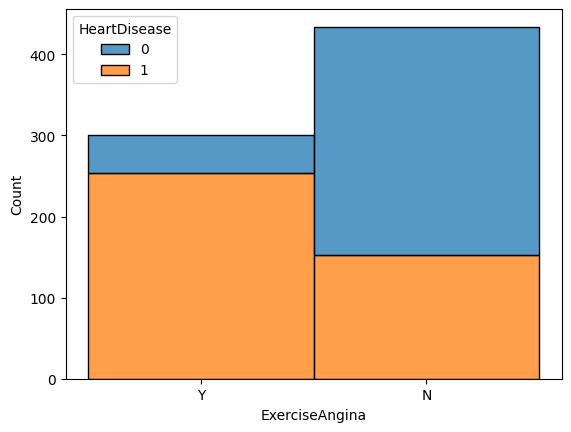

In [93]:
sns.histplot(data=train_united, x="ExerciseAngina", hue="HeartDisease", multiple="stack")

In [94]:
train_united.groupby("ExerciseAngina")["HeartDisease"].value_counts()

ExerciseAngina  HeartDisease
N               0               282
                1               152
Y               1               254
                0                46
Name: count, dtype: int64

In [95]:
counts = train_united.groupby(["ExerciseAngina", "HeartDisease"]).size().unstack(fill_value=0)
counts = counts.div(counts.sum(axis=1), axis=0) * 100
counts = counts.round(2)
counts

HeartDisease,0,1
ExerciseAngina,,
N,64.98,35.02
Y,15.33,84.67


> Nice, another good feature. In 85% of patients with angina during excercie the heart disease is present. At the same time, excercise agina present in non heart disesase patients in 35%. Next feature is **oldpeak**

<Axes: xlabel='Oldpeak', ylabel='Count'>

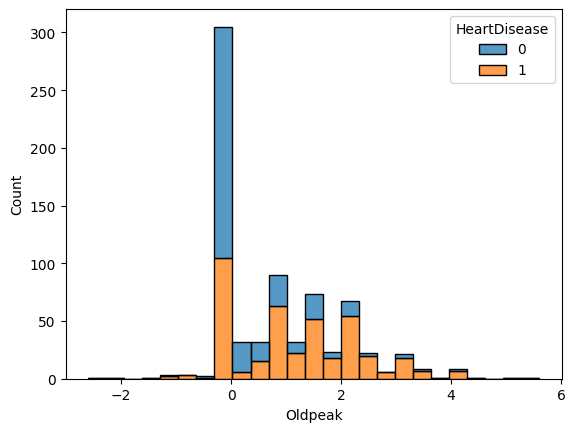

In [96]:
sns.histplot(data=train_united, x="Oldpeak", hue="HeartDisease", multiple="stack")

<Axes: xlabel='Oldpeak', ylabel='Count'>

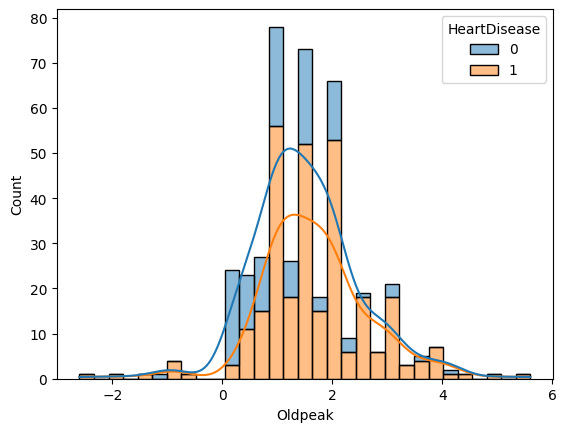

In [97]:
sns.histplot(data=train_united[(train_united["Oldpeak"] < -0.5) | (train_united["Oldpeak"] > 0.1)], x="Oldpeak", hue="HeartDisease", multiple="stack", kde=True)

> Okay, here we see when there are ST segment deviations, it is also indicative of heart disease prense, ecpesially on an exterme spectrum of values. Last but not least feature is **ST slope** direction 

<Axes: xlabel='ST_Slope', ylabel='Count'>

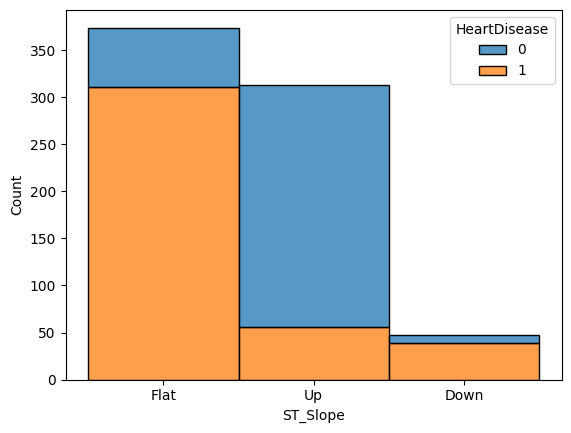

In [98]:
sns.histplot(data=train_united, x="ST_Slope", hue="HeartDisease", multiple="stack")

In [99]:
train_united.groupby("ST_Slope")["HeartDisease"].value_counts()

ST_Slope  HeartDisease
Down      1                39
          0                 8
Flat      1               311
          0                63
Up        0               257
          1                56
Name: count, dtype: int64

In [100]:
counts = train_united.groupby(["ST_Slope", "HeartDisease"]).size().unstack(fill_value=0)
counts = counts.div(counts.sum(axis=1), axis=0) * 100
counts = counts.round(2)
counts

HeartDisease,0,1
ST_Slope,,
Down,17.02,82.98
Flat,16.84,83.16
Up,82.11,17.89


> From the current observation, we see that Down or Flat ST slope direction is an indicator of heart disease in 83% of cases. At the same time, upward direction is a strong indicator of heart disease absence.

### Cross-feature correlation

> Now let's see how features correlate among one another

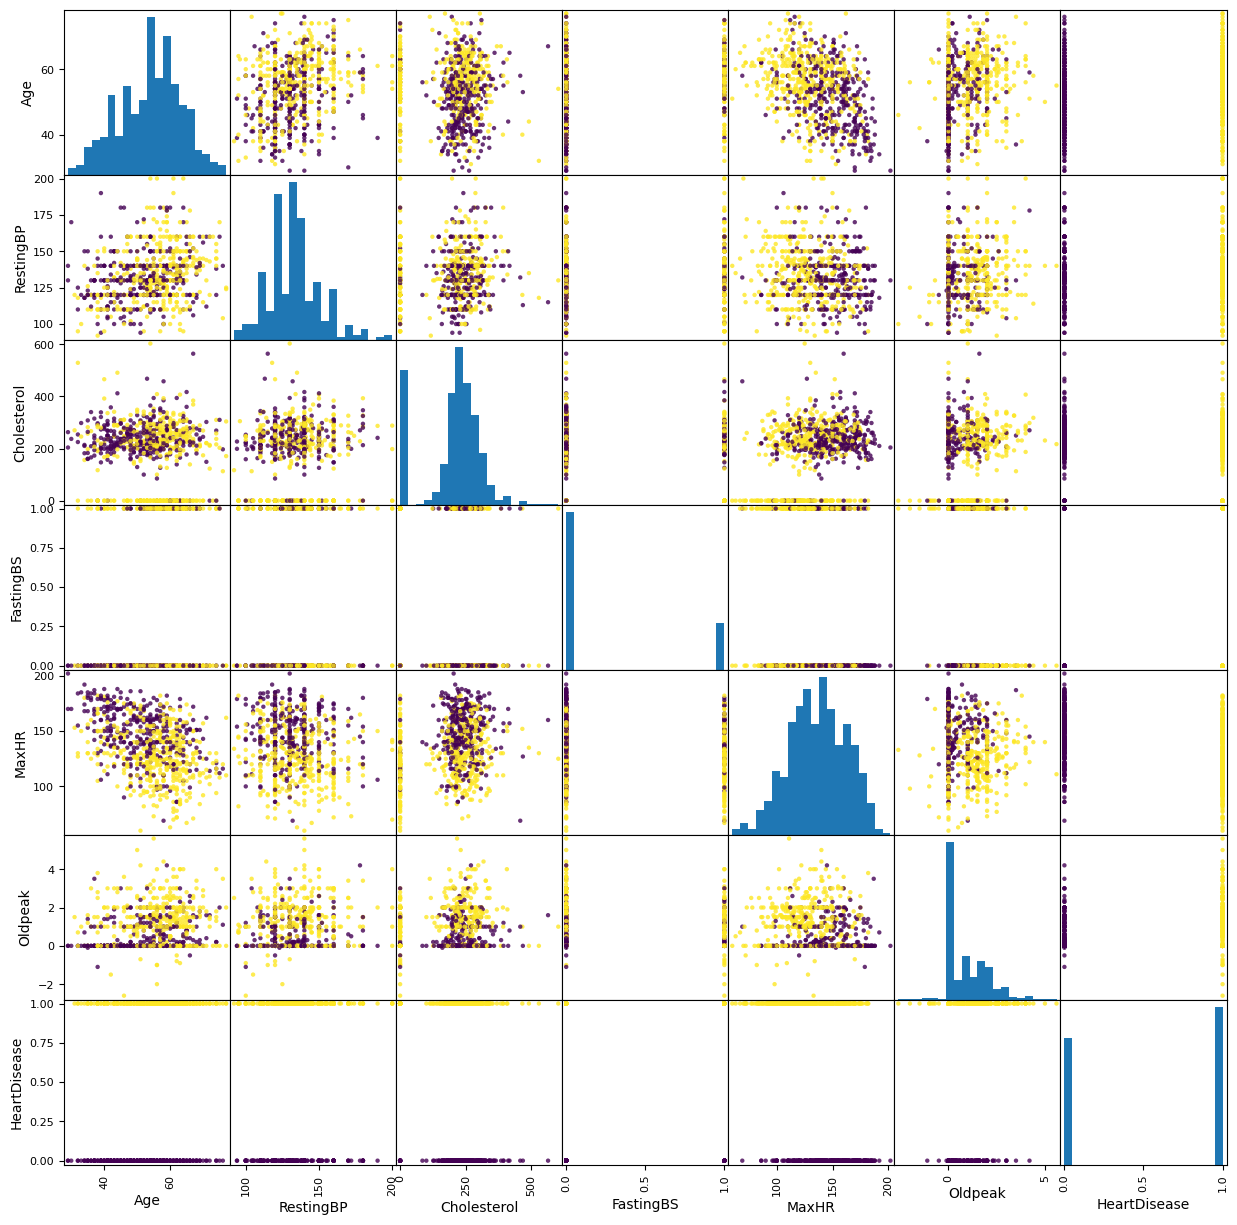

In [101]:
import matplotlib.pyplot as plt
from pandas.plotting  import scatter_matrix

scatter_matrix(train_united, c=train_united['HeartDisease'], figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=10, alpha=0.8)
plt.show()

> Okay, here we visually confirm that there is a negative correlation between **MaxHR** and **Age**. Also there are pretty good clusters between **Oldpeak** and **MaxHR**, **RestingBP** and **MaxHR**. Now let's build a heatmap

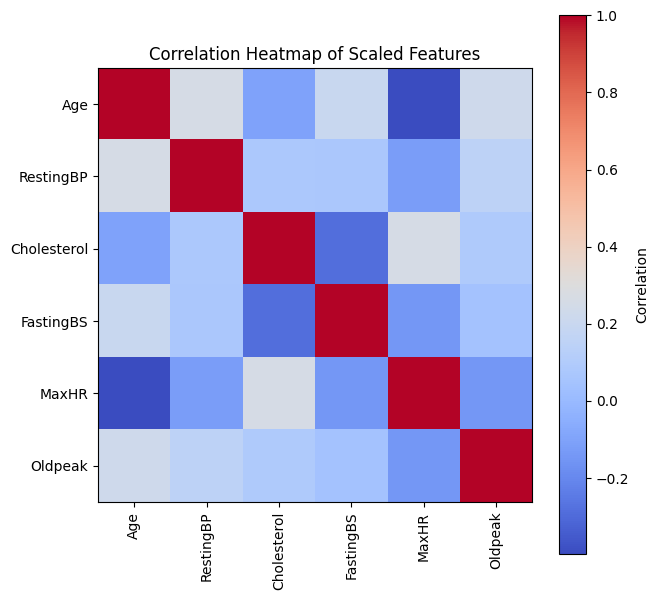

In [102]:
import numpy as np
from sklearn.preprocessing import StandardScaler

numeric_cols = X_train.select_dtypes(include=[np.number]).columns
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train[numeric_cols])
X_train_scaled_pd = pd.DataFrame(X_train_scaled, columns=numeric_cols, index=X_train.index)
correlation_matrix = X_train_scaled_pd.corr()

plt.figure(figsize=(7, 7))
plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation")
plt.title("Correlation Heatmap of Scaled Features")
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

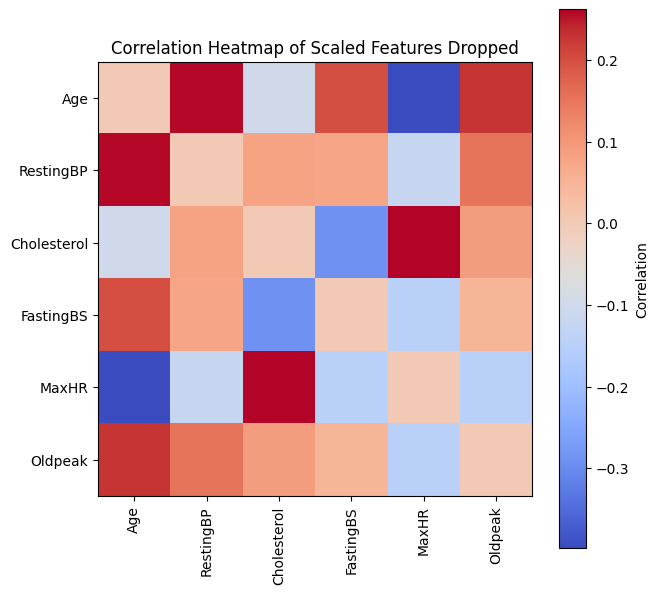

In [103]:
correlation_matrix_dropped = correlation_matrix.replace(float(1), 0)

plt.figure(figsize=(7, 7))
plt.imshow(correlation_matrix_dropped, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation")
plt.title("Correlation Heatmap of Scaled Features Dropped")
plt.xticks(range(len(correlation_matrix_dropped.columns)), correlation_matrix_dropped.columns, rotation=90)
plt.yticks(range(len(correlation_matrix_dropped.columns)), correlation_matrix_dropped.columns)
plt.show()

> Here we can additionally see that there is a positive correlation between **RestingBP** and **Age**, **Cholesterol** and **MaxHR**

## Model selection, evaluation and training

> At first, let's define a list of models that we would be evaluating for the performance

In [104]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42)),
    ('AdaBoost Classifier', AdaBoostClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGBoost Classifier', XGBClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Naive Bayes Classifier', GaussianNB()),
    ('Extra Trees Classifier', ExtraTreesClassifier(random_state=42)),
    ('LightGBM Classifier', LGBMClassifier(random_state=42)),
    ('CatBoost Classifier', CatBoostClassifier(random_state=42, verbose=0)),
    ('Bagging Classifier', BaggingClassifier(random_state=42)),
    ('Neural Network (MLP)', MLPClassifier(random_state=42, max_iter=1000)),
    ('SGD Classifier', SGDClassifier(random_state=42)),
    ('Voting Classifier', VotingClassifier(estimators=[
        ('lr', LogisticRegression(random_state=42)), 
        ('rf', RandomForestClassifier(random_state=42)), 
        ('svc', SVC(probability=True, random_state=42))
    ], voting='soft'))
]

> Now let's define required preprocessing

In [105]:
from sklearn.base import BaseEstimator, TransformerMixin

class ReplaceZeroWithMean(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.means_ = X.replace(0, np.nan).mean()
        return self
    
    def transform(self, X, y=None):
        X = X.copy()
        for column in X.columns:
            if X[column].dtype == int:
                X[column] = X[column].astype(float)
            X.loc[X[column] == 0, column] = self.means_[column]
        return X

In [106]:
# Define preprocessing for numerical features
numerical_features = ["Age", "RestingBP", "MaxHR", "Oldpeak"]
numerical_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Define preprocessing for Cholesterol to replace 0 values with mean
cholesterol_transformer = Pipeline(steps=[
    ("replace_zero", ReplaceZeroWithMean()),
    ("scaler", StandardScaler())
])

# Define preprocessing for categorical features
categorical_features = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cholesterol", cholesterol_transformer, ["Cholesterol"]),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [107]:
df = pd.read_csv("heart.csv")

X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

> And now let's evaluate their performance without fine-tuning 

In [108]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [109]:
model_scores = {}

for name, model in models:
    model_scores[name] = {}
    
    clf = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", model)])
    clf.fit(X_train, y_train)
    model_scores[name]["score"] = clf.score(X_val, y_val)

    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    model_scores[name]["cv_scores"] = cv_scores
    model_scores[name]["cv_scores_mean"] = cv_scores.mean()

  File "C:\Users\Asus\PycharmProjects\MLSET\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[LightGBM] [Info] Number of positive: 406, number of negative: 328
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 385
[LightGBM] [Info] Number of data points in the train set: 734, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553134 -> initscore=0.213340
[LightGBM] [Info] Start training from score 0.213340
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [110]:
sorted_models = sorted(model_scores.items(), key=lambda x: x[1]["score"], reverse=True)

In [111]:
for model_name, data in sorted_models:
    print(model_name)
    print(f"Score: {data['score']}")
    print(f"CV mean score: {data['cv_scores_mean']}")
    print(f"CV scores: {data['cv_scores']}")
    print("--------------------------------------------------------")

CatBoost Classifier
Score: 0.907608695652174
CV mean score: 0.8623707017053397
CV scores: [0.89115646 0.85034014 0.86394558 0.86394558 0.84246575]
--------------------------------------------------------
KNeighbors Classifier
Score: 0.8804347826086957
CV mean score: 0.8337526791538533
CV scores: [0.8707483  0.80952381 0.85714286 0.82312925 0.80821918]
--------------------------------------------------------
Random Forest
Score: 0.8804347826086957
CV mean score: 0.8432671698816513
CV scores: [0.8707483  0.84353741 0.85034014 0.85034014 0.80136986]
--------------------------------------------------------
Logistic Regression
Score: 0.875
CV mean score: 0.8432671698816513
CV scores: [0.89115646 0.85714286 0.83673469 0.82993197 0.80136986]
--------------------------------------------------------
Gradient Boosting
Score: 0.875
CV mean score: 0.8446649892833846
CV scores: [0.8707483  0.82993197 0.86394558 0.82993197 0.82876712]
--------------------------------------------------------
Extra Tr

> Okay, so as for now we see that **CatBoost Classifier** is the best-performing model (score 0.9076), the next one is **KNeighbors Classifier** (score 0.8804) and the third one is **Random Forest** (score 0.8804). Let's try to fine-tune hyperparameters of these models and evaluate their performance

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
param_grid_catboost = {
    'classifier__learning_rate': [0.01, 0.1, 0.5],
    'classifier__depth': [4, 6, 8],
    'classifier__iterations': [50, 100, 200]
}

catboost_model = CatBoostClassifier(random_state=42, verbose=0)
clf_catboost = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", catboost_model)])

grid_search_catboost = GridSearchCV(clf_catboost, param_grid_catboost, cv=5, verbose=1, n_jobs=-1)
grid_search_catboost.fit(X_train, y_train)

print("CatBoost Classifier - Best parameters found:")
print(grid_search_catboost.best_params_)
print(f"Best cross-validation score: {grid_search_catboost.best_score_:.4f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
CatBoost Classifier - Best parameters found:
{'classifier__depth': 6, 'classifier__iterations': 100, 'classifier__learning_rate': 0.5}
Best cross-validation score: 0.8651


In [114]:
param_grid_kneighbors = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree']
}

kneighbors_model = KNeighborsClassifier()

clf_kneighbors = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", kneighbors_model)])

grid_search_kneighbors = GridSearchCV(clf_kneighbors, param_grid_kneighbors, cv=5, verbose=1, n_jobs=-1)
grid_search_kneighbors.fit(X_train, y_train)

print("KNeighbors Classifier - Best parameters found:")
print(grid_search_kneighbors.best_params_)
print(f"Best cross-validation score: {grid_search_kneighbors.best_score_:.4f}")
print()

Fitting 5 folds for each of 24 candidates, totalling 120 fits
KNeighbors Classifier - Best parameters found:
{'classifier__algorithm': 'auto', 'classifier__n_neighbors': 7, 'classifier__weights': 'uniform'}
Best cross-validation score: 0.8474



In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid_randomforest = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

randomforest_model = RandomForestClassifier(random_state=42)

clf_randomforest = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", randomforest_model)])

grid_search_randomforest = GridSearchCV(clf_randomforest, param_grid_randomforest, cv=5, verbose=1, n_jobs=-1)
grid_search_randomforest.fit(X_train, y_train)

print("RandomForest Classifier - Best parameters found:")
print(grid_search_randomforest.best_params_)
print(f"Best cross-validation score: {grid_search_randomforest.best_score_:.4f}")
print()

Fitting 5 folds for each of 108 candidates, totalling 540 fits
RandomForest Classifier - Best parameters found:
{'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best cross-validation score: 0.8596



> Now let's train models with best parameters and evaluate their accuracy on a validation data

In [116]:
from sklearn.metrics import accuracy_score

catboost_model = CatBoostClassifier(random_state=42, verbose=0, depth=6, iterations=100, learning_rate=0.5)
clf_catboost = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", catboost_model)])
clf_catboost.fit(X_train, y_train)

y_pred_catboost = clf_catboost.predict(X_val)
accuracy_catboost = accuracy_score(y_val, y_pred_catboost)
print(f"CatBoost Classifier - Validation Accuracy: {accuracy_catboost:.4f}")

CatBoost Classifier - Validation Accuracy: 0.8587


In [117]:
from sklearn.metrics import accuracy_score

kneighbors_model = KNeighborsClassifier(algorithm="auto", n_neighbors=7, weights="uniform")
clf_kneighbors = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", kneighbors_model)])
clf_kneighbors.fit(X_train, y_train)

y_pred_kneighbors = clf_kneighbors.predict(X_val)
accuracy_kneighbors = accuracy_score(y_val, y_pred_kneighbors)
print(f"KNeighbors Classifier - Validation Accuracy: {accuracy_kneighbors:.4f}")

KNeighbors Classifier - Validation Accuracy: 0.8859


In [118]:
from sklearn.metrics import accuracy_score

randomforest_model = RandomForestClassifier(random_state=42, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200)
clf_randomforest = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", randomforest_model)])
clf_randomforest.fit(X_train, y_train)

y_pred_randomforest = clf_randomforest.predict(X_val)
accuracy_randomforest = accuracy_score(y_val, y_pred_randomforest)
print(f"RandomForest Classifier - Validation Accuracy: {accuracy_randomforest:.4f}")

RandomForest Classifier - Validation Accuracy: 0.8967


> Hm, it's interesting that we are getting better and better results and they are not as ones that we expected from the beginning. Now **CatBoost Classifier** is on the last position, second one is **KNeighbors Classifier** and the first one is **KNeighbors Classifier**. Let's try to automate the grid parameters search, training and evaluation not to miss potentially good-performing models

In [119]:
models = [
    ("Logistic Regression", LogisticRegression(random_state=42), {}),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42), {
        'classifier__learning_rate': [0.01, 0.1, 0.5],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 7]
    }),
    ("KNeighbors Classifier", KNeighborsClassifier(), {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree']
    }),
    ("Decision Tree Classifier", DecisionTreeClassifier(random_state=42), {
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    }),
    ("AdaBoost Classifier", AdaBoostClassifier(random_state=42), {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.5]
    }),
    ("Random Forest", RandomForestClassifier(random_state=42), {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    }),
    ("XGBoost Classifier", XGBClassifier(random_state=42), {
        'classifier__learning_rate': [0.01, 0.1, 0.5],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 7]
    }),
    ("Support Vector Machine", SVC(random_state=42), {
        'classifier__C': [0.1, 1, 10],
        'classifier__gamma': [0.1, 1, 'scale', 'auto']
    }),
    ("Naive Bayes Classifier", GaussianNB(), {}),
    ("Extra Trees Classifier", ExtraTreesClassifier(random_state=42), {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    }),
    ("LightGBM Classifier", LGBMClassifier(random_state=42), {
        'classifier__learning_rate': [0.01, 0.1, 0.5],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 7]
    }),
    ("CatBoost Classifier", CatBoostClassifier(random_state=42, verbose=0), {
        'classifier__learning_rate': [0.01, 0.1, 0.5],
        'classifier__depth': [4, 6, 8],
        'classifier__iterations': [50, 100, 200]
    }),
    ("Bagging Classifier", BaggingClassifier(random_state=42), {
        'classifier__n_estimators': [10, 20, 30],
        'classifier__max_samples': [0.5, 0.8, 1.0],
        'classifier__max_features': [0.5, 0.8, 1.0]
    }),
    ("Neural Network (MLP)", MLPClassifier(random_state=42, max_iter=1000), {
        'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'classifier__activation': ['relu', 'tanh'],
        'classifier__alpha': [0.0001, 0.001, 0.01]
    }),
    ("SGD Classifier", SGDClassifier(random_state=42), {
    'classifier__loss': ['hinge', 'log_loss', 'modified_huber'],
    'classifier__penalty': ['l2', 'l1', 'elasticnet'],
    'classifier__alpha': [0.0001, 0.001, 0.01]
    }),
    ("Voting Classifier", VotingClassifier(estimators=[
        ("lr", LogisticRegression(random_state=42)), 
        ("rf", RandomForestClassifier(random_state=42)), 
        ("svc", SVC(probability=True, random_state=42))
    ], voting="soft"), {})
]

In [120]:
results = {}

for name, model, param_grid in models:
    print(f"Training {name}...")
    clf = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", model)])
    
    if param_grid:
        grid_search = GridSearchCV(clf, param_grid, cv=5, verbose=1, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        clf = grid_search.best_estimator_
    else:
        clf.fit(X_train, y_train)

    y_pred = clf.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    results[name] = {
        "model": clf,
        "accuracy": accuracy
    }

Training Logistic Regression...
Training Gradient Boosting...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Training KNeighbors Classifier...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Training Decision Tree Classifier...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Training AdaBoost Classifier...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Training Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Training XGBoost Classifier...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Training Support Vector Machine...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Training Naive Bayes Classifier...
Training Extra Trees Classifier...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Training LightGBM Classifier...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Number of positive: 406, number of negative: 328
[LightGBM] [Info]

In [121]:
sorted([(name, data["accuracy"]) for name, data in results.items()], key=lambda x: x[1], reverse=True)

[('Random Forest', 0.8967391304347826),
 ('KNeighbors Classifier', 0.8858695652173914),
 ('SGD Classifier', 0.8804347826086957),
 ('Logistic Regression', 0.875),
 ('AdaBoost Classifier', 0.8695652173913043),
 ('Voting Classifier', 0.8695652173913043),
 ('Extra Trees Classifier', 0.8641304347826086),
 ('XGBoost Classifier', 0.8586956521739131),
 ('CatBoost Classifier', 0.8586956521739131),
 ('Bagging Classifier', 0.8586956521739131),
 ('LightGBM Classifier', 0.8532608695652174),
 ('Neural Network (MLP)', 0.8532608695652174),
 ('Support Vector Machine', 0.842391304347826),
 ('Naive Bayes Classifier', 0.842391304347826),
 ('Gradient Boosting', 0.8206521739130435),
 ('Decision Tree Classifier', 0.7989130434782609)]

> Hm, it seems that we are having the same top performer, **Random Forest**, as we uncovered previously. I'm wondering maybe we should not apply standard scaler and populating cholesterol with mean values, maybe we would obtain better results. Let's try that out

In [134]:
df = pd.read_csv("heart.csv")
df.select_dtypes(include="object").columns
df_encodded = pd.get_dummies(data=df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], 
                             drop_first="True") * 1

df_encodded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [135]:
X = df_encodded.drop(columns=["HeartDisease"])
y = df_encodded["HeartDisease"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [124]:
new_models = [
    ("Logistic Regression", LogisticRegression(random_state=42), {}),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42), {
        'learning_rate': [0.01, 0.1, 0.5],
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7]
    }),
    ("KNeighbors Classifier", KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree']
    }),
    ("Decision Tree Classifier", DecisionTreeClassifier(random_state=42), {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    ("AdaBoost Classifier", AdaBoostClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5]
    }),
    ("Random Forest", RandomForestClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    ("XGBoost Classifier", XGBClassifier(random_state=42), {
        'learning_rate': [0.01, 0.1, 0.5],
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7]
    }),
    ("Support Vector Machine", SVC(random_state=42), {
        'C': [0.1, 1, 10],
        'gamma': [0.1, 1, 'scale', 'auto']
    }),
    ("Naive Bayes Classifier", GaussianNB(), {}),
    ("Extra Trees Classifier", ExtraTreesClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    ("LightGBM Classifier", LGBMClassifier(random_state=42), {
        'learning_rate': [0.01, 0.1, 0.5],
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7]
    }),
    ("CatBoost Classifier", CatBoostClassifier(random_state=42, verbose=0), {
        'learning_rate': [0.01, 0.1, 0.5],
        'depth': [4, 6, 8],
        'iterations': [50, 100, 200]
    }),
    ("Bagging Classifier", BaggingClassifier(random_state=42), {
        'n_estimators': [10, 20, 30],
        'max_samples': [0.5, 0.8, 1.0],
        'max_features': [0.5, 0.8, 1.0]
    }),
    ("Neural Network (MLP)", MLPClassifier(random_state=42, max_iter=1000), {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'alpha': [0.0001, 0.001, 0.01]
    }),
    ("SGD Classifier", SGDClassifier(random_state=42), {
        'loss': ['hinge', 'log_loss', 'modified_huber'],
        'penalty': ['l2', 'l1', 'elasticnet'],
        'alpha': [0.0001, 0.001, 0.01]
    }),
    ("Voting Classifier", VotingClassifier(estimators=[
        ("lr", LogisticRegression(random_state=42)), 
        ("rf", RandomForestClassifier(random_state=42)), 
        ("svc", SVC(probability=True, random_state=42))
    ], voting="soft"), {})
]

In [125]:
new_results = {}

for name, model, param_grid in new_models:
    print(f"Training {name}...")
    
    if param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=5, verbose=1, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_
    else:
        model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    new_results[name] = {
        "model": model,
        "accuracy": accuracy
    }

Training Logistic Regression...
Training Gradient Boosting...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Training KNeighbors Classifier...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Training Decision Tree Classifier...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Training AdaBoost Classifier...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Training Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Training XGBoost Classifier...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Training Support Vector Machine...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Training Naive Bayes Classifier...
Training Extra Trees Classifier...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Training LightGBM Classifier...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Number of positive: 406, number of negative: 328
[LightGBM] [Info]

In [126]:
sorted([(name, data["accuracy"]) for name, data in new_results.items()], key=lambda x: x[1], reverse=True)

[('Naive Bayes Classifier', 0.9130434782608695),
 ('XGBoost Classifier', 0.8967391304347826),
 ('Voting Classifier', 0.8967391304347826),
 ('Logistic Regression', 0.8913043478260869),
 ('AdaBoost Classifier', 0.8913043478260869),
 ('Random Forest', 0.8913043478260869),
 ('Extra Trees Classifier', 0.8913043478260869),
 ('CatBoost Classifier', 0.8858695652173914),
 ('Bagging Classifier', 0.8858695652173914),
 ('Neural Network (MLP)', 0.875),
 ('LightGBM Classifier', 0.8695652173913043),
 ('Gradient Boosting', 0.8641304347826086),
 ('Decision Tree Classifier', 0.8369565217391305),
 ('Support Vector Machine', 0.7445652173913043),
 ('KNeighbors Classifier', 0.7065217391304348),
 ('SGD Classifier', 0.6739130434782609)]

> Wow, now we are getting new models that are leading. And for the first time we crossed the **Accuracy** margin of 0.9. Let's further try to work with the selected models and provide more parameters for hyperparameters fine-tuning 

In [127]:
new_models_selected = [
    ("XGBoost Classifier", XGBClassifier(random_state=42), {
        'learning_rate': [0.01, 0.1, 0.5, 1.0],
        'n_estimators': [50, 100, 200, 400],
        'max_depth': [3, 5, 7, 9, 11],
        'min_child_weight': [1, 3, 5, 7, 9],
        'gamma': [0.0, 0.1, 0.4],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
    }),
    ("Logistic Regression", LogisticRegression(random_state=42), {
        'C': [0.01, 0.1, 1.0, 10.0, 100.0],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [50, 200, 500],
        'class_weight': [None, 'balanced']
    }),
    ("AdaBoost Classifier", AdaBoostClassifier(random_state=42), {
        'n_estimators': [50, 100, 200, 300, 400],
        'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0]
    }),
    ("Random Forest", RandomForestClassifier(random_state=42), {
        'n_estimators': [50, 100, 200, 300, 400],
        'max_depth': [None, 10, 20, 30, 50],
        'min_samples_split': [2, 5, 10, 15, 20],
        'min_samples_leaf': [1, 2, 4, 6, 8],
        'max_features': ['sqrt', 'log2', None]
    }),
    ("Extra Trees Classifier", ExtraTreesClassifier(random_state=42), {
        'n_estimators': [50, 100, 200, 300, 400],
        'max_depth': [None, 10, 20, 30, 50],
        'min_samples_split': [2, 5, 10, 15, 20],
        'min_samples_leaf': [1, 2, 4, 6, 8],
        'max_features': ['sqrt', 'log2', None]
    }),
]

In [128]:
new_results_selected = {}

for name, model, param_grid in new_models_selected:
    print(f"Training {name}...")

    grid_search = GridSearchCV(model, param_grid, cv=3, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    model = grid_search.best_estimator_

    y_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    new_results_selected[name] = {
        "model": model,
        "accuracy": accuracy,
        "best_parameters": grid_search.best_params_
    }

Training XGBoost Classifier...
Fitting 3 folds for each of 10800 candidates, totalling 32400 fits
Training Logistic Regression...
Fitting 3 folds for each of 120 candidates, totalling 360 fits
Training AdaBoost Classifier...
Fitting 3 folds for each of 25 candidates, totalling 75 fits
Training Random Forest...
Fitting 3 folds for each of 1875 candidates, totalling 5625 fits
Training Extra Trees Classifier...
Fitting 3 folds for each of 1875 candidates, totalling 5625 fits


In [129]:
sorted([(name, data["accuracy"]) for name, data in new_results_selected.items()], key=lambda x: x[1], reverse=True)

[('Extra Trees Classifier', 0.8913043478260869),
 ('XGBoost Classifier', 0.8858695652173914),
 ('Logistic Regression', 0.8858695652173914),
 ('AdaBoost Classifier', 0.8858695652173914),
 ('Random Forest', 0.8695652173913043)]

> Even with extended hyperparameters search for the most promising models we did not cross the 0.9 margin. That is why we can consider that **Naive Bayes Classifier** is the best-performing model up yet. Let's verify the results we obtained with this model

In [131]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [136]:
y_pred_nb = nb_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_nb)
cv_scores = cross_val_score(nb_model, X_train, y_train, cv=5)

print("Accuracy:", accuracy)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())
print("Standard deviation of CV accuracy:", cv_scores.std())

Accuracy: 0.9130434782608695
Cross-validation scores: [0.87755102 0.87755102 0.85714286 0.82993197 0.83561644]
Mean CV accuracy: 0.8555586618208928
Standard deviation of CV accuracy: 0.02012091854130362


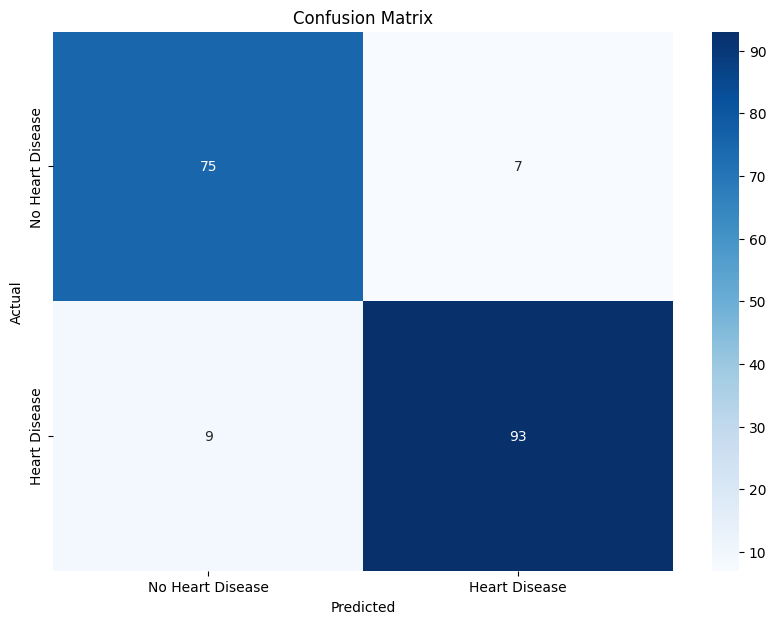

In [139]:
from sklearn.metrics import confusion_matrix

ticks = df["HeartDisease"].map({0:"No Heart Disease", 1:"Heart Disease"}).unique()
cm_nb = confusion_matrix(y_val, y_pred_nb)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=ticks, yticklabels=ticks)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()